# 7072CEM - MACHINE LEARNING

# Importing  Library

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Data Uploding and Splitting

In [5]:
skillcraft = pd.read_csv(r"C:\Users\DELL LAPTOP\Downloads\SkillCraft1_Dataset.csv")
#print(skillcraft)

df_train, df_test = train_test_split(skillcraft, test_size=0.2, random_state=111)

df_train.head()


,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
2405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1317,3809.0,4.0,20.0,20,700,75.9204,0.000056,0.000070,5.0,0.000000,0.000028,0.003235,31.7205,59.5826,4.3652,19.0,0.000577,7.0,0.0,0.0
2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1915,5460.0,4.0,17.0,10,450,59.0778,0.000385,0.000223,4.0,0.000071,0.000415,0.002563,59.3968,82.1976,4.2292,33.0,0.000608,7.0,0.0,0.0


In [6]:
df_test.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
1020,2947.0,4.0,18.0,2,400,73.7772,0.000249,0.000050,2.0,0.000000,0.000025,0.002784,57.0090,60.1071,5.0089,14.0,0.000820,3.0,0.00000,0.000000
2420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1762,5086.0,6.0,19.0,48,2016,155.9874,0.003925,0.000587,6.0,0.000147,0.000120,0.004673,21.3983,43.1886,5.5971,21.0,0.003845,7.0,0.00036,0.000814
760,2221.0,2.0,23.0,6,600,54.3660,0.000652,0.000146,0.0,0.000000,0.000034,0.002195,63.8902,90.5156,4.6250,23.0,0.000677,6.0,0.00000,0.000197
1608,4636.0,4.0,32.0,12,750,107.0676,0.000811,0.000363,1.0,0.000085,0.000509,0.003766,30.8000,50.7524,5.1383,25.0,0.000557,6.0,0.00000,0.000000


# LeagueIndex vs all Features

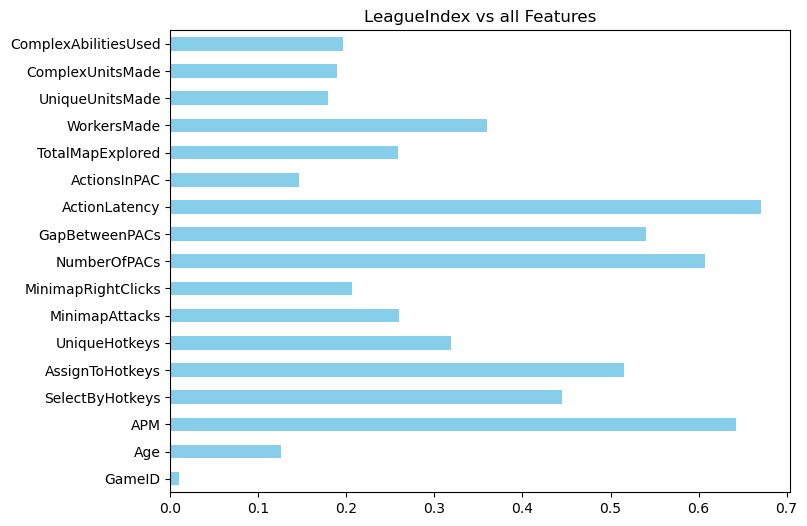

In [7]:
skillcraft.drop('LeagueIndex', axis=1).corrwith(skillcraft.LeagueIndex).abs().plot(kind='barh',
                                                           figsize=(8, 6),
                                                           color='skyblue',
                                                           title="LeagueIndex vs all Features")
plt.show()

# Data Analysis

# LeagueIndex vs ActionLatency

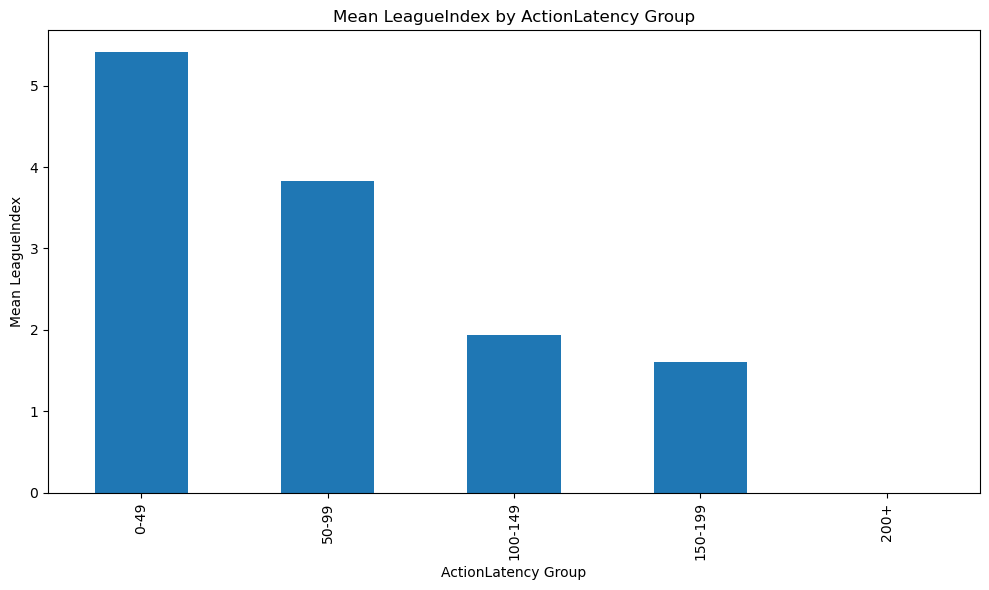

In [9]:


bin_edges = [0, 50, 100, 150, 200, np.inf]
bin_labels = ['0-49', '50-99', '100-149', '150-199', '200+']

skillcraft['ActionLatencyGroup'] = pd.cut(skillcraft['ActionLatency'], bins=bin_edges, labels=bin_labels)

mean_leagueindex = skillcraft.groupby('ActionLatencyGroup')['LeagueIndex'].mean()

plt.figure(figsize=(10, 6))
mean_leagueindex.plot(kind='bar')
plt.xlabel('ActionLatency Group')
plt.ylabel('Mean LeagueIndex')
plt.title('Mean LeagueIndex by ActionLatency Group')
 
plt.tight_layout() 
plt.show()


#  LeagueIndex vs APM 

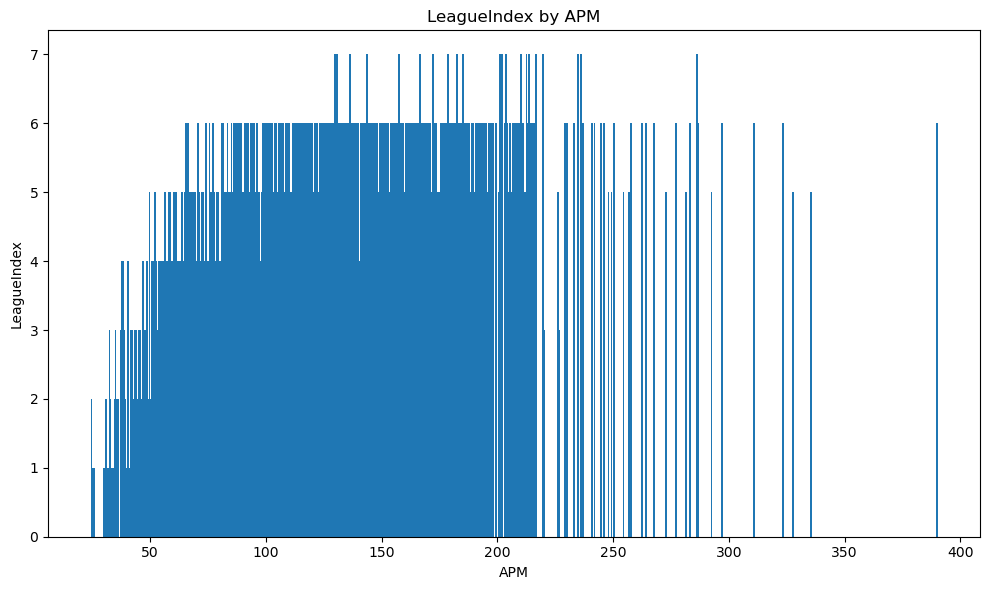

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(skillcraft['APM'], skillcraft['LeagueIndex'])
plt.xlabel('APM')
plt.ylabel('LeagueIndex')
plt.title('LeagueIndex by APM')

plt.tight_layout() 
plt.show()

# LeagueIndex vs GapBetweenPACs

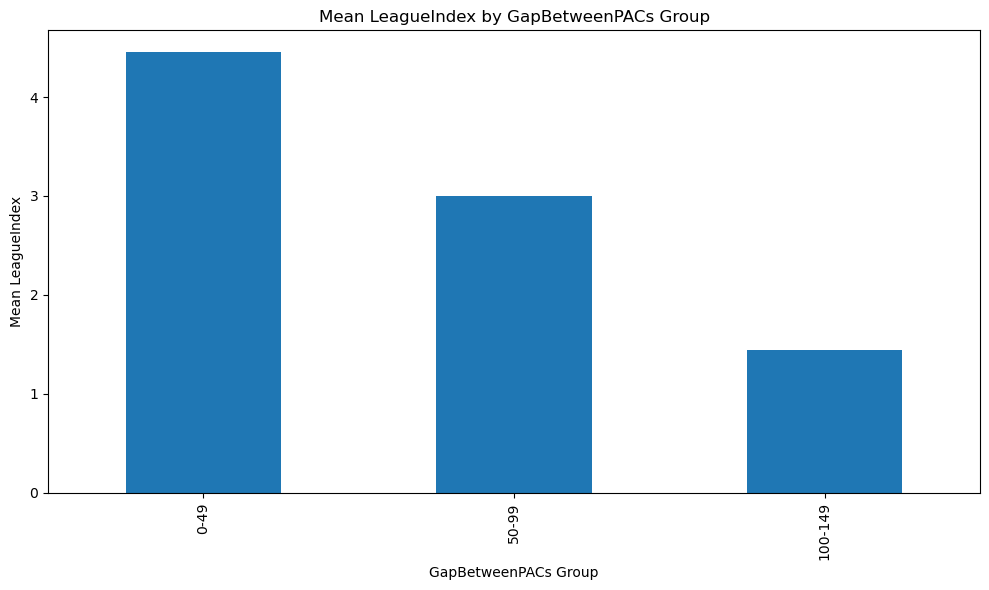

In [12]:

bin_edges = [0, 50, 100, np.inf]
bin_labels = ['0-49', '50-99', '100-149']

skillcraft['GapBetweenPACsGroup'] = pd.cut(skillcraft['GapBetweenPACs'], bins=bin_edges, labels=bin_labels)

mean_leagueindex = skillcraft.groupby('GapBetweenPACsGroup')['LeagueIndex'].mean()

plt.figure(figsize=(10, 6))
mean_leagueindex.plot(kind='bar')
plt.xlabel('GapBetweenPACs Group')
plt.ylabel('Mean LeagueIndex')
plt.title('Mean LeagueIndex by GapBetweenPACs Group')

plt.tight_layout()  
plt.show()

# Linear Regression

In [15]:
df_train = df_train.replace('?', np.nan)
df_train = df_train.dropna()

y = df_train['LeagueIndex'].values.flatten()

rmvd_colm =['GameID', 'LeagueIndex','TotalHours','MinimapRightClicks','UniqueUnitsMade','ComplexUnitsMade','ComplexAbilitiesUsed']
x_1 = df_train.drop(rmvd_colm, axis=1)
x_1 = pd.DataFrame(x_1)  
x_1 = np.asarray(x_1, dtype=np.float64)  

y = np.asarray(y, dtype=np.float64)  

model_1 = sm.OLS(y, x_1).fit()

df_test = df_test.replace('?', np.nan)
df_test = df_test.dropna()

x_test = df_test.drop(rmvd_colm, axis=1)
x_test = pd.DataFrame(x_test)  
x_test = np.asarray(x_test, dtype=np.float64) 

y_pred = model_1.predict(x_test)

r_squared = model_1.rsquared
print("R-squared:", r_squared)

mse = mean_squared_error(df_test['LeagueIndex'], y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = np.mean(np.abs(df_test['LeagueIndex'] - y_pred))
print("Mean Absolute Error (MAE):", mae)

print('predicted y:',y_pred)

R-squared: 0.9464811194489913
Mean Squared Error (MSE): 0.9154142379156872
Root Mean Squared Error (RMSE): 0.9567728246118236
Mean Absolute Error (MAE): 0.7607541280334252
predicted y: [ 2.84270977  6.44823648  2.20603239  4.33792748  4.61863673  3.74775162
  4.82795052  3.72575482  4.21480136  3.5228834   2.87030845  6.11269038
  3.33039984  4.49146707  4.17321363  6.48860918  3.68457689  5.36094998
  3.0910495   3.66994598  5.49121111  5.06771791  4.10580109  5.08876734
  2.3595233   2.71162523  4.72101789  3.6739826   4.25498581  5.00784007
  3.23198727  3.3329524   4.20098698  4.41107765  2.40461852  5.3266012
  5.12111358  3.22820338  3.25329505  3.13160118  1.72671749  2.70899268
  4.38225516  3.56324947  5.16297624  4.99764118  4.64894444  6.37346177
  5.8927731   2.93769808  3.25480617  4.87598509  3.48275093  1.98198914
  5.25832526  0.95653384  4.29639881  3.49252805  6.68046237  2.67126863
  3.79218381  3.23395141  3.20907187  3.3629949   5.46393417  8.49538474
  4.17505896 

# Polynomial Regression

In [22]:

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)

model_poly = sm.OLS(y_train, x_train_poly).fit()


df_test = df_test.replace('?', np.nan)
df_test = df_test.dropna()
y_test = df_test['LeagueIndex'].values.flatten()
x_test = df_test.drop(rmvd_colm, axis=1)
x_test_poly = poly_features.transform(x_test)

y_pred_poly = model_poly.predict(x_test_poly)

r_squared = r2_score(y_test, y_pred_poly)
print("R-squared:", r_squared)

mse = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = np.mean(np.abs(y_test - y_pred_poly))
print("Mean Absolute Error (MAE):", mae)

print(y_pred_poly)


R-squared: 0.4003703787892787
Mean Squared Error (MSE): 1.0700803912880625
Root Mean Squared Error (RMSE): 1.0344469011447917
Mean Absolute Error (MAE): 0.7598014840565848
[ 2.87234641  6.67158004  2.15929656  4.15807618  4.82007388  2.46462722
  5.60966233  4.17823882  4.28302413  3.30869126  2.39542527  6.60216216
  3.30606264  4.59653288  4.35175569  5.83705379  3.68750781  5.35991444
  2.81317486  3.84383947  5.63587333  5.25244428  4.67369858  5.57824335
  2.65693958  2.5257522   5.02119395  3.87503866  4.12869034  5.16151555
  3.32362255  3.30654683  4.51520202  4.24814298  2.4562978   5.20130511
  4.87980821  3.03912246  2.96106369  2.906597    1.59488509  2.73648393
  4.56657513  3.6415528   5.14840906  4.78530511  4.92180365  5.94330808
  5.75366493  2.84896749  2.96334291  4.65059406  3.66353938  2.20105433
  5.42527461  1.47873294  4.70690968  3.78501776  5.47736497  2.42879511
  3.34039369  3.44405923  3.60361723  3.32314388  5.42714278  8.10690928
  4.48970824  3.5388885  

# Ridge Regression

In [25]:


ridge_model = Ridge(alpha=0.5)
ridge_model.fit(x_train, y_train)



df_test = df_test.replace('?', np.nan)
df_test = df_test.dropna()
y_test = df_test['LeagueIndex'].values.flatten()
x_test = df_test.drop(['GameID', 'LeagueIndex'], axis=1)

y_pred = ridge_model.predict(x_test)

r2 = ridge_model.score(x_test, y_test)
print("R-squared:", r2)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = np.mean(np.abs(y_test - y_pred))
print("Mean Absolute Error (MAE):", mae)

print(y_pred)

R-squared: 0.46676206924695685
Mean Squared Error (MSE): 0.9515998433128288
Root Mean Squared Error (RMSE): 0.9754997915493517
Mean Absolute Error (MAE): 0.7640700748148332
[ 3.3708977   5.59202255  2.34397326  4.55627759  4.65939126  2.95543329
  5.38755601  4.01241194  4.13678821  3.4131672   2.42121689  5.71575108
  3.52103263  4.86027233  4.62079552  5.80295865  3.58502604  5.39471614
  3.58210725  4.15537912  4.96591694  5.76040825  4.0088261   5.87117858
  2.64510412  3.37818387  4.73369242  3.99024612  4.35802549  5.19942322
  3.32778091  3.47554281  4.42445623  4.19275501  2.47194237  5.0384677
  4.88149195  3.27383119  3.20717981  2.76966295  2.18433273  3.16310957
  4.5411438   3.81023835  5.33138762  4.96155734  4.8655502   6.60792447
  5.63338001  3.01766743  3.63098657  4.31822632  2.60544922  2.23537626
  5.59339979  0.56613864  5.00592519  3.832641    5.66650991  2.8444432
  3.89853138  2.92685184  3.1085116   3.68405049  5.74505218  7.38423453
  4.29760965  3.70108472  